In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.utils import shuffle
np.random.seed(0)
import missingno as mg
import datetime
from pmdarima.arima import auto_arima
from datetime import datetime,timedelta

In [54]:
def mape(y, y_pred):
    return np.mean(np.abs((y_pred - y) / y)) * 100

In [55]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [56]:
test = pd.read_csv('Google_Stock_Price_Test.csv')

In [57]:
cols = [i for i in df.columns if i != 'Date']
min_max_scaler = []
for col in cols:
    df[col] = df[col].apply(lambda x:str(x).replace(',',''))
    df[col]=df[col].astype(float)
    
    test[col] = test[col].apply(lambda x:str(x).replace(',',''))
    test[col]=test[col].astype(float)
    
    scaler_df = pd.DataFrame(df[col])
    mms = MinMaxScaler()
    mms.fit(scaler_df)
    df[col] = mms.transform(scaler_df)
    test[col] = mms.transform(pd.DataFrame(test[col]))
    min_max_scaler.append(mms)

In [58]:
data = df[cols].values
X=[]
y=[]
m=20
for i in range(len(df)-m):
    X.append(data[i:m+i,:])
    y.append(data[m+i,:])
test_last = test.iloc[:m,-5:]
test_x = test.iloc[:m,-5:].values
test_x = test_x.reshape(1,test_x.shape[0],test_x.shape[1])

In [59]:
ind = shuffle(list(range(len(X))))
train_ind = ind[:int(0.8*len(ind))]
vali_ind = ind[int(0.8*len(ind)):]
x_train,y_train = np.array([X[i] for i in train_ind]),np.array([y[i] for i in train_ind])
x_valid,y_valid = np.array([X[i] for i in vali_ind]),np.array([y[i] for i in vali_ind])

In [60]:
def lstm_predict(x_train,y_train,x_valid,y_valid):
    # reshape before input
    model = tf.keras.Sequential()
    # Adding the first LSTM layer and some Dropout regularisation
    # set units = 64 for input layer
    model.add(tf.keras.layers.LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))
    # drop_out layer，to prevent overfit
    model.add(tf.keras.layers.Dropout(0.2))
    # # Adding a second LSTM layer and some Dropout regularisation
#     model.add(tf.keras.layers.LSTM(units=64,return_sequences=True,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.LSTM(units=64,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.LSTM(units=40, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))
    # # Adding a third LSTM layer and some Dropout regularisation
#     model.add(tf.keras.layers.LSTM(units=32,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.3))
    # Adding the output layer
    # last input layer，input units=1
#     model.add(tf.keras.layers.Dense(units=64,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))
#     model.add(tf.keras.layers.Dense(units=64,activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=y_train.shape[1],activation='linear'))
    # Compiling the RNN, choose adam optimizer 
    adam = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam, loss='mean_squared_error')#tf.keras.optimizers.Adam(learning_rate=0.001)
    # Fitting the RNN to the Training set
    history = model.fit(x_train, y_train, epochs=500, batch_size=64,verbose=2,validation_data=(x_valid,y_valid))
#     model.save('model.h5')
    print(model.summary())
    import matplotlib.pyplot as plt
#     #interactive images
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
#     epochs_range = range(epoch)
#     plt.plot(epochs_range, loss, label='Train Loss')
#     plt.plot(epochs_range, val_loss, label='Test Loss')
#     plt.legend(loc='upper right')
#     plt.title('Train and Val Loss')
#     plt.show()
    # train loss and validation loss plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('LSTM model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
    return model

C:\Users\admin\miniconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
16/16 - 2s - loss: 0.0928 - val_loss: 0.0196
Epoch 2/500
16/16 - 0s - loss: 0.0249 - val_loss: 0.0080
Epoch 3/500
16/16 - 0s - loss: 0.0141 - val_loss: 0.0044
Epoch 4/500
16/16 - 0s - loss: 0.0101 - val_loss: 0.0034
Epoch 5/500
16/16 - 0s - loss: 0.0089 - val_loss: 0.0027
Epoch 6/500
16/16 - 0s - loss: 0.0082 - val_loss: 0.0023
Epoch 7/500
16/16 - 0s - loss: 0.0076 - val_loss: 0.0022
Epoch 8/500
16/16 - 0s - loss: 0.0070 - val_loss: 0.0021
Epoch 9/500
16/16 - 0s - loss: 0.0072 - val_loss: 0.0020
Epoch 10/500
16/16 - 0s - loss: 0.0063 - val_loss: 0.0021
Epoch 11/500
16/16 - 0s - loss: 0.0064 - val_loss: 0.0022
Epoch 12/500
16/16 - 0s - loss: 0.0062 - val_loss: 0.0019
Epoch 13/500
16/16 - 0s - loss: 0.0058 - val_loss: 0.0018
Epoch 14/500
16/16 - 0s - loss: 0.0055 - val_loss: 0.0018
Epoch 15/500
16/16 - 0s - loss: 0.0052 - val_loss: 0.0019
Epoch 16/500
16/16 - 0s - loss: 0.0053 - val_loss: 0.0018
Epoch 17/500
16/16 - 0s - loss: 0.0052 - val_loss: 0.0018
Epoch 18/500
16/16 - 0s

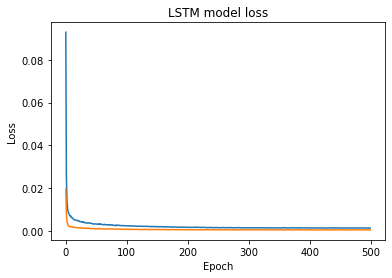

In [61]:
model = lstm_predict(x_train,y_train,x_valid,y_valid)

In [62]:
n = 10
input_x = test_x
result = []
for i in range(n):
    y_pre = model.predict(input_x)
    result.append(y_pre)
    y_pre = y_pre.reshape(y_pre.shape[0],1,y_pre.shape[1])
    input_x = np.hstack((test_x,y_pre))[:,1:,:]

In [63]:
res = pd.DataFrame(columns=cols)
for i in range(len(result)):
    for j in range(len(cols)):
        res.loc[i,cols[j]] = result[i][0][j]

In [64]:
# print('lstm mape:',mape(y_valid, lstm_pre))

In [65]:
for i in range(len(cols)):
    mms = min_max_scaler[i]
    res[cols[i]] = mms.inverse_transform(res[cols[i]].values.reshape(-1, 1))
    test_last[cols[i]] = mms.inverse_transform(test_last[cols[i]].values.reshape(-1, 1))

In [66]:
test_last = pd.concat([test_last,res[:1]])
test_last = test_last.reset_index(drop=True)
res.index = list(range(m,m+len(res)))
res

,Open,High,Low,Close,Volume
20,789.412791,795.686795,781.640578,792.817416,1.862612e+06
21,785.386830,791.615654,777.721679,790.884467,1.976114e+06
22,781.345361,787.607389,773.523924,788.397540,2.077977e+06
23,777.133754,783.428434,769.158170,785.289853,2.172360e+06
24,772.658770,778.984317,764.527562,781.556282,2.262866e+06
25,767.836012,774.191735,759.543743,777.182685,2.352447e+06
26,762.589607,768.975653,754.127606,772.148667,2.443547e+06
27,756.851723,763.268824,748.208446,766.430593,2.538203e+06
28,750.563022,757.012616,741.724714,760.005280,2.638109e+06
29,743.673903,750.158037,734.625120,752.853502,2.744649e+06


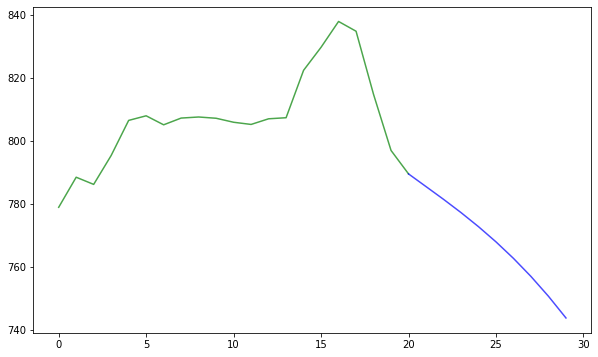

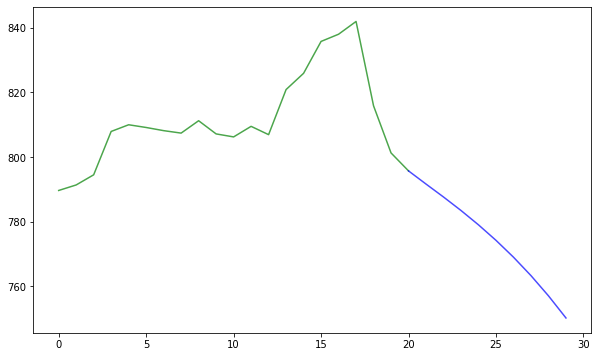

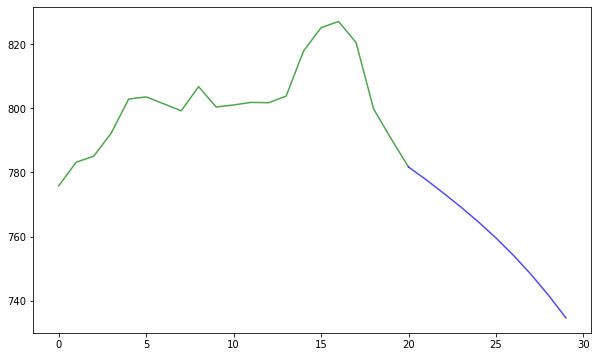

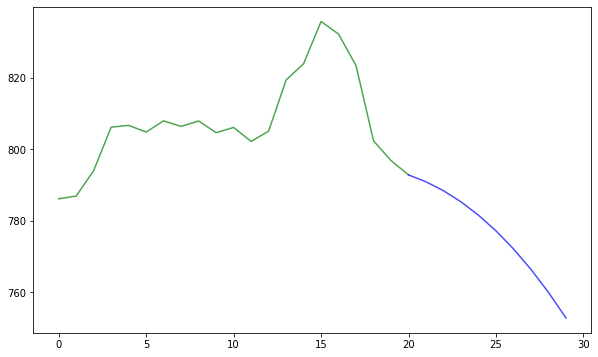

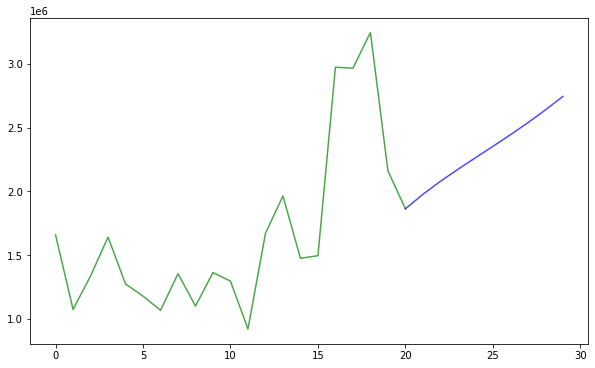

In [67]:
for col in cols:
    plt.figure(figsize=(10,6))
    plt.plot(test_last.index,test_last[col],'g',alpha=0.7)
    plt.plot(res.index,res[col],'b',alpha=0.7)
    plt.show()